# Interior point methods

In [1]:
using LinearAlgebra
using SparseArrays
using Plots

# local modules
push!(LOAD_PATH, realpath("../src"))
using lp_problem
using lp_standard_form_converter
using lp_read_mps
using lp_hsd_ipm

mps_folder_path = "../check/problems/mps_files/"

"../check/problems/mps_files/"

In [2]:
lp = read_mps_from_file(mps_folder_path * "ex_9-7.mps")

# Solve the LP problem
x_opt, y_opt, s_opt, obj_value = hsdLPsolver(lp, verbose=true)

println("Optimal solution: ", x_opt)
println("Objective value: ", obj_value)

 Iter          μ   P.Infeas   D.Infeas        Gap       Step


DimensionMismatch: DimensionMismatch: All inputs to vcat should have the same number of columns

In [15]:
lp = read_mps_from_file(mps_folder_path * "simple.mps")
println(lp)

# Solve the LP problem
x_opt, y_opt, s_opt, obj_value = hsdLPsolver(lp)

println("Optimal solution: ", x_opt)
println("Objective value: ", obj_value)

LPProblem(false, [3.0, 2.0], sparse([1, 2, 1, 3], [1, 1, 2, 2], [1.0, 1.0, 1.0, 1.0], 3, 2), [4.0, 2.0, 3.0], ['L', 'L', 'L'], [0.0, 0.0], [Inf, Inf], ["x1", "x2"], [:Continuous, :Continuous])
Optimal solution: [1.0, 1.0, 7.88860905221285e-231, 0.49999999999999994, 0.2499999999999999]
Objective value: 0.75


In [7]:
lp = LPProblem(false, 
    [4.0, 3.0, 1.0, 7.0, 6.0], 
    sparse([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5], [1.0, 2.0, -3.0, 2.0, -1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 2.0, -1.0, -3.0, 1.0, 2.0], 3, 5), 
    [9.0, 10.0, 11.1], 
    ['L', 'L', 'L'], 
    [0.0, 0.0, 0.0, 0.0, 0.0], 
    [Inf, Inf, Inf, Inf, Inf], 
    ["X1", "X2", "X3", "X4", "X5"], 
    [:Continuous, :Continuous, :Continuous, :Continuous, :Continuous])


LPProblem(false, [4.0, 3.0, 1.0, 7.0, 6.0], sparse([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5], [1.0, 2.0, -3.0, 2.0, -1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 2.0, -1.0, -3.0, 1.0, 2.0], 3, 5), [9.0, 10.0, 11.1], ['L', 'L', 'L'], [0.0, 0.0, 0.0, 0.0, 0.0], [Inf, Inf, Inf, Inf, Inf], ["X1", "X2", "X3", "X4", "X5"], [:Continuous, :Continuous, :Continuous, :Continuous, :Continuous])

┌ Warning: No strict ticks found
└ @ PlotUtils /Users/roryyarr/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/roryyarr/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/roryyarr/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/roryyarr/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/roryyarr/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/roryyarr/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils /Users/roryyarr/.julia/packages/PlotUtils/8mrSm/src/ticks.jl:194


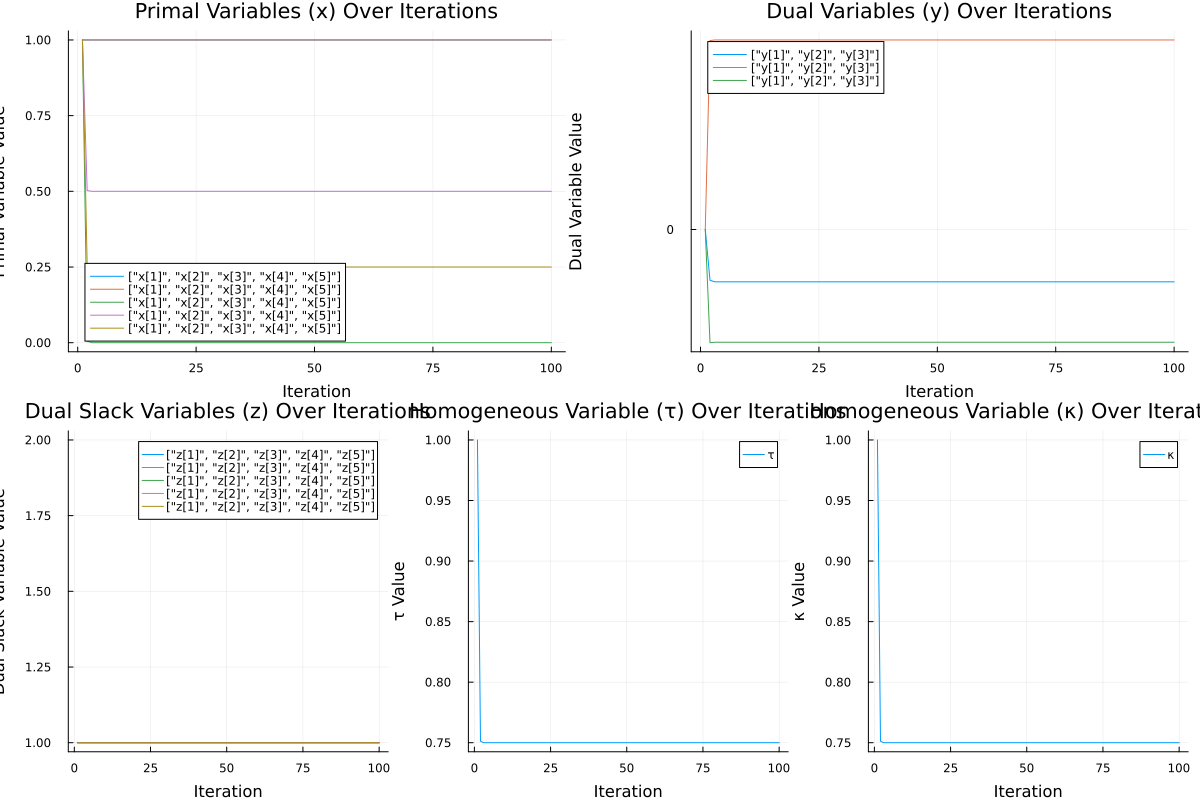

In [14]:
# Solve the LP problem using the homogeneous self-dual solver
x_opt, y_opt, z_opt, τ_opt, κ_opt, iter, x_vals, y_vals, z_vals, τ_vals, κ_vals = hsdLPsolver(lp)

# Define the number of iterations (x-axis)
n_iter = 1:length(x_vals)

# Create the layout for 5 subplots (2 rows, 3 columns)
layout = @layout [a b; c d e]

# Plot primal variable x over iterations
p1 = plot(n_iter, hcat(x_vals...)', label=["x[$i]" for i in 1:length(x_vals[1])],
    title="Primal Variables (x) Over Iterations", xlabel="Iteration", ylabel="Primal Variable Value")

# Plot dual variable y over iterations
p2 = plot(n_iter, hcat(y_vals...)', label=["y[$i]" for i in 1:length(y_vals[1])],
    title="Dual Variables (y) Over Iterations", xlabel="Iteration", ylabel="Dual Variable Value")

# Plot dual slack variable z over iterations
p3 = plot(n_iter, hcat(z_vals...)', label=["z[$i]" for i in 1:length(z_vals[1])],
    title="Dual Slack Variables (z) Over Iterations", xlabel="Iteration", ylabel="Dual Slack Variable Value")

# Plot τ over iterations
p4 = plot(n_iter, τ_vals, title="Homogeneous Variable (τ) Over Iterations",
    xlabel="Iteration", ylabel="τ Value", label="τ")

# Plot κ over iterations
p5 = plot(n_iter, κ_vals, title="Homogeneous Variable (κ) Over Iterations",
    xlabel="Iteration", ylabel="κ Value", label="κ")

# Combine all plots into a single figure with the specified layout
plot(p1, p2, p3, p4, p5, layout=layout, size=(1200, 800))

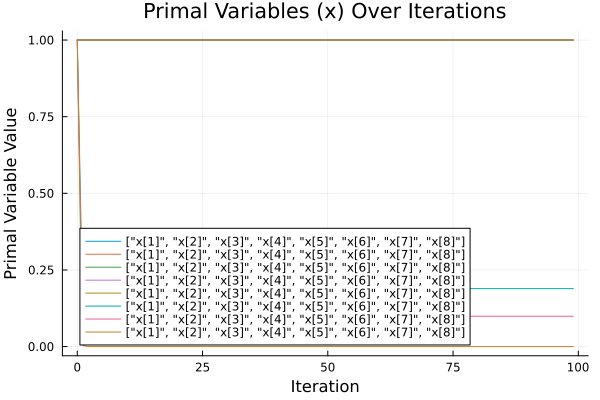

In [9]:
# Plot primal variable x over iterations
plot(n_iter, hcat(x_vals...)', label=["x[$i]" for i in 1:length(x_vals[1])], title="Primal Variables (x) Over Iterations",
    xlabel="Iteration", ylabel="Primal Variable Value")

In [5]:
filepath = mps_folder_path * "test.mps"
println(read_file_to_string(filepath))

NAME          BLEND

OBJSENSE
 MAX
 
ROWS
 N  PROF
 L  VVEG
 L  NVEG
 L  UHRD
 G  LHRD
 E  CONT
COLUMNS
    VEG01     PROF      -110.0    VVEG         1.0
    VEG01     UHRD         8.8    LHRD         8.8
    VEG01     CONT         1.0
    VEG02     PROF      -120.0    VVEG         1.0
    VEG02     UHRD         6.1    LHRD         6.1
    VEG02     CONT         1.0
    OIL01     PROF      -130.0    NVEG         1.0
    OIL01     UHRD         2.0    LHRD         2.0
    OIL01     CONT         1.0
    OIL02     PROF      -110.0    NVEG         1.0
    OIL02     UHRD         4.2    LHRD         4.2
    OIL02     CONT         1.0
    OIL03     PROF      -115.0    NVEG         1.0
    OIL03     UHRD         5.0    LHRD         5.0
    OIL03     CONT         1.0
    PROD      PROF       150.0    UHRD        -6.0
    PROD      LHRD        -3.0    CONT        -1.0
RHS
    RHS       VVEG       200.0
    RHS       NVEG       250.0
    RHS       UHRD         0.0
    RHS       LHRD         0.0
 

In [6]:
lp = read_mps_from_file_mip(mps_folder_path * "test.mps")

UndefVarError: UndefVarError: `read_mps_from_file_mip` not defined

In [7]:
print(read_mps_from_file(mps_folder_path * "test.mps"))

LPProblem(false, [-110.0, -120.0, -130.0, -110.0, -115.0, 150.0], sparse([1, 3, 4, 5, 1, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 3, 4, 5], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6], [1.0, 8.8, -8.8, 1.0, 1.0, 6.1, -6.1, 1.0, 1.0, 2.0, -2.0, 1.0, 1.0, 4.2, -4.2, 1.0, 1.0, 5.0, -5.0, 1.0, -6.0, 3.0, -1.0], 5, 6), [200.0, 250.0, 0.0, -0.0, 0.0], ['L', 'L', 'L', 'L', 'E'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [Inf, Inf, Inf, Inf, Inf, Inf], ["VEG01", "VEG02", "OIL01", "OIL02", "OIL03", "PROD"], [:Continuous, :Continuous, :Continuous, :Continuous, :Continuous, :Continuous])

In [15]:
struct Parameters
    maxIter::Int
    tol::Float64
    eta::Float64
    verbose::Int
end

struct IPMSolver
    mip_prob::MIPProblem
    pars::Parameters
    
    function IPMSolver(mip_prob::MIPProblem)
        return new(mip_prob, Parameters(100, 1e-6, 0.95, 1))
    end
    
    function IPMSolver(mip_prob::MIPProblem, pars::Parameters)
        return new(mip_prob, pars)
    end
    
    function IPMSolver(A::SparseMatrixCSC{Float64, Int64}, b::Vector{Float64}, c::Vector{Float64}, l::Vector{Float64}, u::Vector{Float64}, vars::Vector{String}, variable_types::Vector{Symbol}, constraint_types::Vector{Char})
        mip_prob = MIPProblem(true, c, A, b, l, u, vars, variable_types, constraint_types)
        return new(mip_prob, Parameters(100, 1e-6, 0.95, 1))
    end
end


In [ ]:


# Interior Point Method for solving LPProblem
function interior_point_solver(lp::MIPProblem; tol=1e-6, max_iter=100)
    # Unpack problem data
    c = lp.is_minimize ? lp.c : -lp.c  # Adjust for maximization problems
    A = lp.A
    b = lp.b
    m, n = size(A)

    # Initialize variables
    x = ones(n)  # Primal variables (start with feasible guess)
    s = ones(n)  # Slack variables
    y = zeros(m)  # Dual variables
    μ = 1.0  # Barrier parameter

    for iter in 1:max_iter
        # Compute residuals
        r_dual = A' * y + s - c
        r_cent = s .* x - μ * ones(n)
        r_pri = A * x - b

        # Check convergence
        if norm(r_dual, Inf) < tol && norm(r_pri, Inf) < tol && norm(r_cent, Inf) < tol
            println("Converged in $iter iterations.")
            return x
        end

        # Form the KKT matrix
        D_inv = Diagonal(1.0 ./ x)
        M = A * D_inv * A'
        rhs = -(r_pri + A * D_inv * (r_cent - D_inv * r_dual))

        # Solve for the dual variables
        Δy = M \ rhs

        # Solve for the primal and slack variables
        Δs = r_dual - A' * Δy
        Δx = -x .+ D_inv * (r_cent - Δs .* x)

        # Line search for feasibility
        α = 1.0
        for i in 1:n
            if Δx[i] < 0
                α = min(α, -x[i] / Δx[i])
            end
            if Δs[i] < 0
                α = min(α, -s[i] / Δs[i])
            end
        end
        α = 0.99 * α  # Take a step just inside the feasible region

        # Update variables
        x += α * Δx
        s += α * Δs
        y += α * Δy

        # Update the barrier parameter
        μ *= 0.9  # Reduce barrier parameter
    end

    println("Maximum iterations reached without convergence.")
    return x
end


In [ ]:
# # Example usage
# A = sparse([1.0 2.0; 3.0 4.0])
# b = [1.0, 1.0]
# c = [-1.0, -2.0]
# l = [0.0, 0.0]
# u = [Inf, Inf]
# vars = ["x1", "x2"]
# variable_types = [:Continuous, :Continuous]
# constraint_types = ['L', 'L']

# lp = LPProblem(true, c, A, b, l, u, vars, variable_types, constraint_types)

# Solve the LP problem
solution = interior_point_solver(lp)
println("Optimal solution: ", solution)


In [ ]:
# Solve the LP problem
solution = interior_point_solver(lp, tol=1e-8, max_iter=5000)
println("Optimal solution: ", solution)

## HDS

In [4]:
function hsdLPsolver_test(lp::LPProblem; toler=1e-8, beta=0.995)
    # Extract data from LPProblem
    c = lp.c
    A = lp.A
    b = lp.b
    constraint_types = lp.constraint_types
    l = lp.l
    u = lp.u
    variable_types = lp.variable_types

    n_vars = length(c)
    n_constraints = length(b)

    # Initialize variables
    n = n_vars
    m = n_constraints

    # Process variable bounds
    # Adjust variables to have non-negative lower bounds
    constant_term = 0.0
    l_mod = zeros(n)
    u_mod = fill(Inf, n)
    bindx = Int[]
    u_list = Float64[]
    findx = Int[]

    for i in 1:n
        if variable_types[i] != :Continuous
            error("Non-continuous variables are not supported.")
        end

        l_i = lp.l[i]
        u_i = lp.u[i]

        # Handle free variables
        if isinf(l_i) && isinf(u_i)
            push!(findx, i)
            l_mod[i] = -Inf
            u_mod[i] = Inf
        else
            # Shift variable if l_i != 0
            if l_i != 0
                # Shift variable: x_i' = x_i - l_i
                # Adjust b: b = b - A[:, i] * l_i
                b -= A[:, i] * l_i

                # Adjust the constant term in the objective function
                constant_term += c[i] * l_i

                # Update lower and upper bounds
                l_mod[i] = 0
                if !isinf(u_i)
                    u_mod[i] = u_i - l_i
                    push!(bindx, i)
                    push!(u_list, u_mod[i])
                else
                    u_mod[i] = Inf
                end
            else
                l_mod[i] = 0
                if !isinf(u_i)
                    u_mod[i] = u_i
                    push!(bindx, i)
                    push!(u_list, u_mod[i])
                else
                    u_mod[i] = Inf
                end
            end
        end
    end

    # Process constraints
    # Convert inequalities to equalities by adding slack variables
    A_eq = copy(A)
    c_eq = copy(c)
    b_eq = copy(b)
    n_slack = 0
    slack_var_indices = Int[]

    for i in 1:m
        constraint_type = constraint_types[i]
        if constraint_type == 'E'
            # Equality constraint, no action needed
            continue
        elseif constraint_type == 'L'
            # Less than or equal to (≤): a_i x ≤ b_i
            # Convert to equality: a_i x + s_i = b_i, s_i ≥ 0
            n_slack += 1
            s_i_index = n + n_slack
            push!(slack_var_indices, s_i_index)

            # Expand A_eq
            A_eq = hcat(A_eq, spzeros(m, 1))
            A_eq[i, s_i_index] = 1.0

            # Expand c_eq
            c_eq = vcat(c_eq, 0.0)

            # Update variable bounds
            push!(l_mod, 0.0)
            push!(u_mod, Inf)
        elseif constraint_type == 'G'
            # Greater than or equal to (≥): a_i x ≥ b_i
            # Convert to equality: a_i x - s_i = b_i, s_i ≥ 0
            n_slack += 1
            s_i_index = n + n_slack
            push!(slack_var_indices, s_i_index)

            # Expand A_eq
            A_eq = hcat(A_eq, spzeros(m, 1))
            A_eq[i, s_i_index] = -1.0

            # Expand c_eq
            c_eq = vcat(c_eq, 0.0)

            # Update variable bounds
            push!(l_mod, 0.0)
            push!(u_mod, Inf)
        else
            error("Unknown constraint type: $(constraint_type)")
        end
    end

    n_total = n + n_slack

    # Handle free variables
    if !isempty(findx)
        A_free = A_eq[:, findx]
        A_eq = hcat(A_eq, -A_free)
        c_free = c_eq[findx]
        c_eq = vcat(c_eq, -c_free)

        # Update variable bounds for new variables
        l_mod = vcat(l_mod, zeros(length(findx)))
        u_mod = vcat(u_mod, fill(Inf, length(findx)))

        # Update indices
        n_total += length(findx)
    end

    # Normalize c and b
    combined = vcat(c_eq, b_eq)
    norbc = 1 + maximum(combined) - minimum(combined)
    c_eq /= norbc
    b_eq /= norbc
    u_list = [u / norbc for u in u_list]

    # Initialize variables
    x = ((norm(b_eq) + 1) / sqrt(n_total)) * ones(n_total)
    s = ((norm(c_eq) + 1) / sqrt(n_total)) * ones(n_total)
    nb = length(bindx)

    if nb > 0
        z = ((norm(b_eq) + 1) / sqrt(n_total)) * ones(nb)
        w = ((norm(c_eq) + 1) / sqrt(n_total)) * ones(nb)
        eez = ones(nb)
        u = u_list
    else
        z = [1.0]
        w = [0.0]
        eez = [0.0]
        u = [0.0]
    end

    y = zeros(m)
    tau0 = 1.0
    kappa0 = (norm(c_eq) + 1) * (norm(b_eq) + 1) / n_total
    tau = tau0
    kappa = kappa0

    # Compute initial residuals
    mu0 = (dot(x, s) + dot(z, w) + tau * kappa) / (n_total + nb + 1)
    mu = mu0
    rp = tau * b_eq - A_eq * x

    if nb > 0
        rb = x[bindx] + z - tau * u
    else
        rb = zeros(0)
    end

    rd = tau * c_eq - A_eq' * y - s
    if nb > 0
        rd[bindx] += w
    end
    obp = dot(c_eq, x)
    obd = dot(b_eq, y) - dot(u, w)
    rg = obp - obd + kappa
    zh = [(obp - obd) / tau]

    # Iteration
    gamma = 1 / sqrt(n_total + nb + 1)
    go = 1.0
    iter = 1

    while go >= toler
        # Compute cvx and cvz
        cvx = (gamma * mu) * ones(n_total) ./ x - s
        if nb > 0
            cvz = (gamma * mu) * ones(nb) ./ z - w
            woz = w ./ z
        else
            cvz = zeros(0)
            woz = zeros(0)
        end

        # Compute r1
        r1 = cvx - rd
        if nb > 0
            r1[bindx] -= cvz + rb .* woz
        end

        # Compute r2 and r22
        r2 = c_eq
        r22 = c_eq
        if nb > 0
            for i in 1:length(bindx)
                idx = bindx[i]
                r2[idx] -= u[i] * woz[i]
                r22[idx] += u[i] * woz[i]
            end
        end

        # Compute d
        d = s ./ x
        if nb > 0
            for i in 1:length(bindx)
                idx = bindx[i]
                d[idx] += woz[i]
            end
        end
        d = sqrt.(d)

        # Form AD matrix
        AD = A_eq ./ d'

        # Prepare for solving the linear system
        r1d = [r1 ./ d; rp]
        r2d = [-r2 ./ d; b_eq]
        r22d = [-r22 ./ d; b_eq]

        # Solve the linear system
        lhs = [Diagonal(ones(n_total))  AD'; AD  spzeros(m, m)]
        rhs1 = r1d
        rhs2 = r2d

        ss = lhs \ [rhs1  rhs2]
        ss[n_total+1:end, :] .= -ss[n_total+1:end, :]

        # Get dtau
        dtau_num = gamma * mu / tau - kappa + rg
        if nb > 0
            dtau_num += dot(u, cvz + woz .* rb)
        end
        dtau_num -= r22d' * ss[:, 1]
        dtau_den = kappa / tau
        if nb > 0
            dtau_den += dot(u, woz .* u)
        end
        dtau_den += r22d' * ss[:, 2]
        dtau = dtau_num / dtau_den

        ss_total = ss[:, 1] + dtau * ss[:, 2]

        # Get dx
        dx = ss_total[1:n_total] ./ d

        # Get dy
        dy = ss_total[n_total+1:end]

        # Get ds
        ds = cvx - (s .* dx) ./ x

        # Get dz and dw if bounds exist
        if nb > 0
            dz = dtau * u - dx[bindx] - rb
            dw = cvz - woz .* dz
        end

        # Get dkappa
        dkappa = gamma * mu / tau - kappa - kappa * dtau / tau

        # Compute step lengths
        if nb > 0
            ratp = beta / maximum(-[dx ./ x; dz ./ z; dtau / tau; dkappa / kappa])
            ratd = beta / maximum(-[ds ./ s; dw ./ w; dtau / tau; dkappa / kappa])
        else
            ratp = beta / maximum(-[dx ./ x; dtau / tau; dkappa / kappa])
            ratd = beta / maximum(-[ds ./ s; dtau / tau; dkappa / kappa])
        end

        # Update variables
        x += ratp * dx
        y += ratd * dy
        s += ratd * ds
        if nb > 0
            z += ratp * dz
            w += ratd * dw
        end
        taup = tau + ratp * dtau
        taud = tau + ratd * dtau
        tau = min(taup, taud)

        if taup <= taud
            kappa += ratp * dkappa
            y *= tau / taud
            s *= tau / taud
            if nb > 0
                w *= tau / taud
            end
        else
            kappa += ratd * dkappa
            x *= tau / taup
            if nb > 0
                z *= tau / taup
            end
        end

        # Compute new residuals
        mu = (dot(x, s) + dot(z, w) + tau * kappa) / (n_total + nb + 1)
        rp = tau * b_eq - A_eq * x
        if nb > 0
            rb = x[bindx] + z - tau * u
        end
        rd = tau * c_eq - A_eq' * y - s
        if nb > 0
            rd[bindx] += w
        end
        obp = dot(c_eq, x)
        obd = dot(b_eq, y) - dot(u, w)
        rg = obp - obd + kappa
        zh_new = (obp - obd) / tau
        push!(zh, zh_new)

        # Check convergence
        go = maximum([
            norm([rp; rb]) / (tau + norm([x; z])),
            norm(rd) / (tau + norm([s; w])),
            abs(obp - obd) / (tau + abs(obd))
        ])

        # Adjust centering weight
        gamma = 1 / sqrt(n_total + nb + 1)
        if nb > 0
            if minimum([x .* s; z .* w; tau * kappa]) / mu >= (1 - beta)
                gamma = 0.0
            end
        else
            if minimum([x .* s; tau * kappa]) / mu >= (1 - beta)
                gamma = 0.0
            end
        end

        iter += 1
    end

    # Recover solution
    if tau != 0
        x /= tau
        s /= tau
        y /= tau
        if nb > 0
            z /= tau
            w /= tau
        end
        x *= norbc
        s *= norbc
        y *= norbc
        if nb > 0
            z *= norbc
            w *= norbc
        end
    end

    # Adjust for variable shifts
    x_final = x[1:n_vars]
    x_final += lp.l  # Adjust for shifts

    # Add constant term to objective value
    obj_value = dot(lp.c, x_final) + constant_term

    return x_final, y, s, obj_value
end


hsdLPsolver_test (generic function with 1 method)

In [2]:
# Define a simple LP problem
c = [1.0, 2.0]
A = sparse([1.0 1.0])
b = [3.0]
constraint_types = ['L']
l = [0.0, 0.0]
u = [Inf, Inf]
vars = ["x1", "x2"]
variable_types = [:Continuous, :Continuous]
is_minimize = true

lp = LPProblem(
    is_minimize,
    c,
    A,
    b,
    constraint_types,
    l,
    u,
    vars,
    variable_types
)

# Solve the LP problem
x_opt, y_opt, s_opt, obj_value = hsdLPsolver(lp)

println("Optimal solution: ", x_opt)
println("Objective value: ", obj_value)


DimensionMismatch: DimensionMismatch: number of columns of each array must match (got (9, 9, 9, 11, 9))

In [3]:
lp = read_mps_from_file(mps_folder_path * "ex_9-7.mps")

# Solve the LP problem
x_opt, y_opt, s_opt, obj_value = hsdLPsolver(lp)

println("Optimal solution: ", x_opt)
println("Objective value: ", obj_value)


DimensionMismatch: DimensionMismatch: number of columns of each array must match (got (21, 21, 21, 26, 21))

## HSD 2

In [9]:
function generalized_HSD_algorithm(lp::LPProblem)
    # Initialize primal (x), dual (y), and slack (z) variables
    n = length(lp.c)
    m = length(lp.b)

    # Initialize variables (these would typically be feasible initial points or near feasible)
    x = ones(n)  # Primal variables
    y = zeros(m) # Dual variables
    z = ones(n)  # Slack variables
    t = 1.0      # Homogeneous variable
    
    # Initial residuals
    r_p = lp.b - lp.A * x   # Primal residual
    r_d = lp.c - lp.A' * y - z  # Dual residual
    r_c = dot(lp.c, x) - dot(lp.b, y) + t # Complementarity residual
    
    # Iterate until convergence
    max_iterations = 100
    tol = 1e-8
    for k in 1:max_iterations
        # Solve Newton system (details below)
        Δx, Δy, Δz, Δt = solve_newton_system(lp, x, y, z, t, r_p, r_d, r_c)

        # Line search and update primal, dual, and slack variables
        α = compute_step_size(x, Δx, z, Δz)
        x += α * Δx
        y += α * Δy
        z += α * Δz
        t += α * Δt

        # Update residuals
        r_p = lp.b - lp.A * x
        r_d = lp.c - lp.A' * y - z
        r_c = dot(lp.c, x) - dot(lp.b, y) + t

        # Check for convergence
        if norm(r_p) < tol && norm(r_d) < tol && abs(r_c) < tol
            println("Converged in $k iterations")
            break
        end
    end

    return x, y, z
end

generalized_HSD_algorithm (generic function with 1 method)

In [10]:
function solve_newton_system(lp::LPProblem, x, y, z, t, r_p, r_d, r_c)
    # Here you'd solve the Newton system of equations for Δx, Δy, Δz, Δt
    # For simplicity, this can be solved by directly forming the necessary linear system
    # This would involve factorizing the KKT matrix.
    
    # Placeholder for solving the system, returning step directions
    Δx = -x / 2  # Just an example, actual computation would be more complex
    Δy = -y / 2
    Δz = -z / 2
    Δt = -t / 2

    return Δx, Δy, Δz, Δt
end

solve_newton_system (generic function with 1 method)

In [11]:
function compute_step_size(x, Δx, z, Δz)
    # Compute the maximum step size that maintains feasibility
    α = 1.0
    for i in 1:length(x)
        if Δx[i] < 0
            α = min(α, -x[i] / Δx[i])
        end
        if Δz[i] < 0
            α = min(α, -z[i] / Δz[i])
        end
    end
    return α * 0.99  # Step back slightly for numerical stability
end

compute_step_size (generic function with 1 method)

### Using Claud AI

In [31]:
function solve_self_dual(lp::LPProblem; max_iter=1000, tol=1e-8, reg_param=1e-6)
    c, A, b = standardize_lp(lp)
    
    m, n = size(A)
    
    # Construct c_bar
    c_bar = [zeros(n); 1.0; zeros(m); 1.0]
    
    # Construct A_bar
    A_bar = [A  -b  spzeros(m, m)   zeros(m, 1);
             c' 0   -ones(1, m) -1;
             -c'    0   zeros(1, m) 1]
    
    # Construct b_bar
    b_bar = [zeros(m); -1; 1]
    
    # Initial feasible solution
    x = [ones(n); 1.0; ones(m); 1.0]
    y = zeros(m + 2)
    s = ones(n + m + 2)
    
    for iter in 1:max_iter
        mu = dot(x, s) / (n + m + 2)
        gap = abs(dot(c_bar, x) - dot(b_bar, y))
        
        if gap < tol && mu < tol
            println("Converged at iteration ", iter)
            break
        end
        
        r_p = b_bar - A_bar * x
        r_d = c_bar - A_bar' * y - s
        r_c = -x .* s
        
        D = Diagonal(x ./ s)
        M = A_bar * D * A_bar' + reg_param * I
        
        rhs = r_p + A_bar * (D * (r_d - r_c ./ x))
        
        dy = try
            M \ rhs
        catch e
            if isa(e, SingularException) || isa(e, PosDefException)
                println("Warning: Singular or indefinite matrix encountered. Adjusting regularization.")
                epsilon = 1e-6
                M += epsilon * I
                dy = M \ rhs
            else
                rethrow(e)
            end
        end
        
        dx = D * (A_bar' * dy - r_d + r_c ./ x)
        ds = -r_d - A_bar' * dy
        
        # Compute alpha_p
        idx_x = findall(dx .< 0)
        if !isempty(idx_x)
            alpha_p = min(1.0, minimum(-x[idx_x] ./ dx[idx_x]))
        else
            alpha_p = 1.0
        end

        # Compute alpha_d
        idx_s = findall(ds .< 0)
        if !isempty(idx_s)
            alpha_d = min(1.0, minimum(-s[idx_s] ./ ds[idx_s]))
        else
            alpha_d = 1.0
        end

        # Compute overall alpha
        alpha = 0.99 * min(alpha_p, alpha_d)
        
        x += alpha * dx
        y += alpha * dy
        s += alpha * ds
        
        # Optional: Monitor progress
        if iter % 10 == 0
            println("Iteration ", iter, ": gap = ", gap, ", mu = ", mu)
        end
    end
    
    x_sol = x[1:n]
    y_sol = y[1:m]
    s_sol = s[1:n]
    
    return x_sol, y_sol, s_sol
end


solve_self_dual (generic function with 1 method)

In [27]:
function example_usage()
    # Define a simple LP problem
    c = [-1.0; -1.0]
    A = sparse([1.0 1.0; 1.0 -1.0])
    b = [1.0; 2.0]
    constraint_types = ['L'; 'L']
    l = [0.0; 0.0]
    u = [Inf; Inf]
    vars = ["x1"; "x2"]
    variable_types = [:Continuous; :Continuous]
    
    lp = LPProblem(true, c, A, b, constraint_types, l, u, vars, variable_types)
    
    x_sol, y_sol, s_sol = solve_self_dual(lp)
    
    println("Optimal solution:")
    println("x = ", x_sol)
    println("y = ", y_sol)
    println("s = ", s_sol)
end

example_usage (generic function with 1 method)

In [32]:
example_usage()


SingularException: SingularException(0)

## 

# References

Karmarkar, N. A new polynomial-time algorithm for linear programming. Combinatorica 4, 373–395 (1984). https://doi.org/10.1007/BF02579150


```bibtex
@book{SIAMB0000215,
 title={Primal-dual interior-point methods},
 author={Wright, Stephen J.},
 year={1997},
 publisher={Society for Industrial and Applied Mathematics},
 pages={310},
 isbn={9780898713824},
 url={https://portal-igpublish-com.ezproxy.newcastle.edu.au/iglibrary/search/SIAMB0000215.html}
}
```

Megiddo, N. On the complexity of computing an approximate solution for combinatorial optimization problems. SIAM Journal on Computing 18, 1189-1198 (1989). https://doi.org/10.1137/0218074

Forsgren, A., & Gill, P. E. (2007). A Matlab Implementation of a Primal-Dual Interior Point Method for Linear Programming. Computational Optimization and Applications, 36(2-3), 209-241. https://doi.org/10.1007/s10589-006-9005-9